
# Decision Tree


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

import plotly.graph_objects as go
from nltk.corpus import stopwords

## Import data

In [62]:
df = pd.read_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv')
df

,Day_of_Week,Junction_Control,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute,Accident_Severity
0,1,3,0.539929,4,321,0.388342,0.000000,0.000000,0,3,0.833333,0,1,0.260870,0.508475,3
1,1,4,0.090052,4,116,0.597126,0.000000,0.064516,4,3,0.833333,0,1,0.347826,0.813559,3
2,1,5,0.032547,4,88,0.262809,0.000000,0.000000,0,3,0.333333,1,1,0.478261,0.813559,3
3,3,5,0.337348,1,406,0.521226,0.000000,0.000000,2,3,0.333333,1,1,0.826087,0.440678,3
4,0,4,0.155597,1,160,0.794396,0.000000,0.032258,4,3,0.333333,1,3,0.826087,0.101695,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171011,5,3,0.237787,4,287,0.663465,0.021277,0.032258,4,3,0.333333,0,1,0.521739,0.677966,2
171012,0,4,0.168574,1,334,0.770316,0.000000,0.032258,0,4,1.000000,0,1,0.826087,0.491525,2
171013,4,5,0.361220,4,124,0.786760,0.000000,0.000000,0,3,0.833333,0,1,0.695652,0.593220,2
171014,3,5,0.178027,1,143,0.541700,0.000000,0.032258,4,3,0.333333,0,1,0.869565,0.169492,2


In [63]:
# Train/Validation - Test split
X = df.drop('Accident_Severity', axis=1)  # Giả sử 'target' là tên cột nhãn
y = df['Accident_Severity']
# y_discrete = pd.cut(y, bins=5, labels=False)  # Chia thành 5 nhóm rời rạc

# Chia dữ liệu với nhãn mới
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
print(y.dtypes)
print(y.head())


int64
0    3
1    3
2    3
3    3
4    3
Name: Accident_Severity, dtype: int64


## Build and predict

In [65]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'gini', 'max_depth': 30}
Train score: 0.9981873010834427
Validation score: 0.9484065880518467


In [66]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Default scores:
Train score: 0.9999916465487716
Validation score: 0.9492447129909366


In [67]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.911622,0.050336,0.013525,0.001882,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.939022,0.935970,0.934592,0.939228,0.935678,0.936898,0.001877,1
7,0.873953,0.102371,0.007317,0.001212,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.938771,0.934425,0.935302,0.936722,0.936555,0.936355,0.001473,2
2,0.784391,0.075490,0.014392,0.002147,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.840120,0.832930,0.839195,0.831008,0.831927,0.835036,0.003833,3
6,0.954122,0.066460,0.011120,0.002512,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.818987,0.818603,0.819773,0.812004,0.830256,0.819925,0.005867,4
1,0.577551,0.065250,0.012963,0.003898,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.724220,0.725712,0.722914,0.721452,0.722955,0.723451,0.001431,5
5,0.784985,0.105873,0.011164,0.003092,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.710061,0.704912,0.708963,0.710801,0.711344,0.709216,0.002295,6
0,0.303785,0.041410,0.008876,0.000994,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.617049,0.618035,0.620082,0.616072,0.621335,0.618515,0.001937,7
4,0.427092,0.047335,0.010271,0.001739,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.616798,0.615863,0.616866,0.609389,0.617116,0.615207,0.002940,8


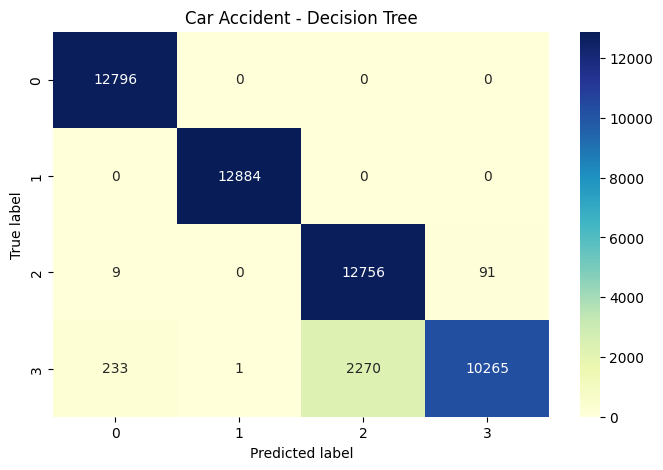

In [68]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Car Accident - Decision Tree")
plt.show()

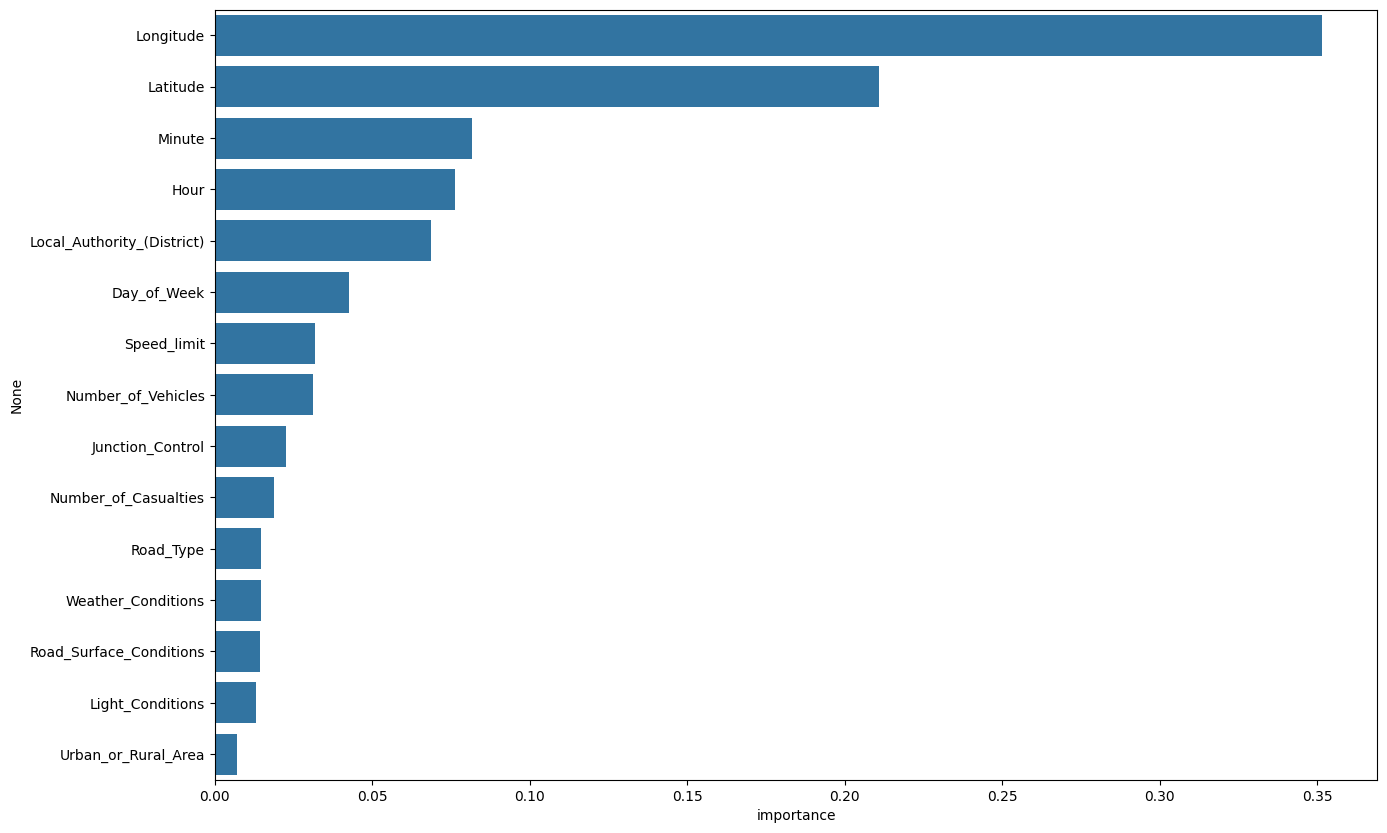

In [69]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

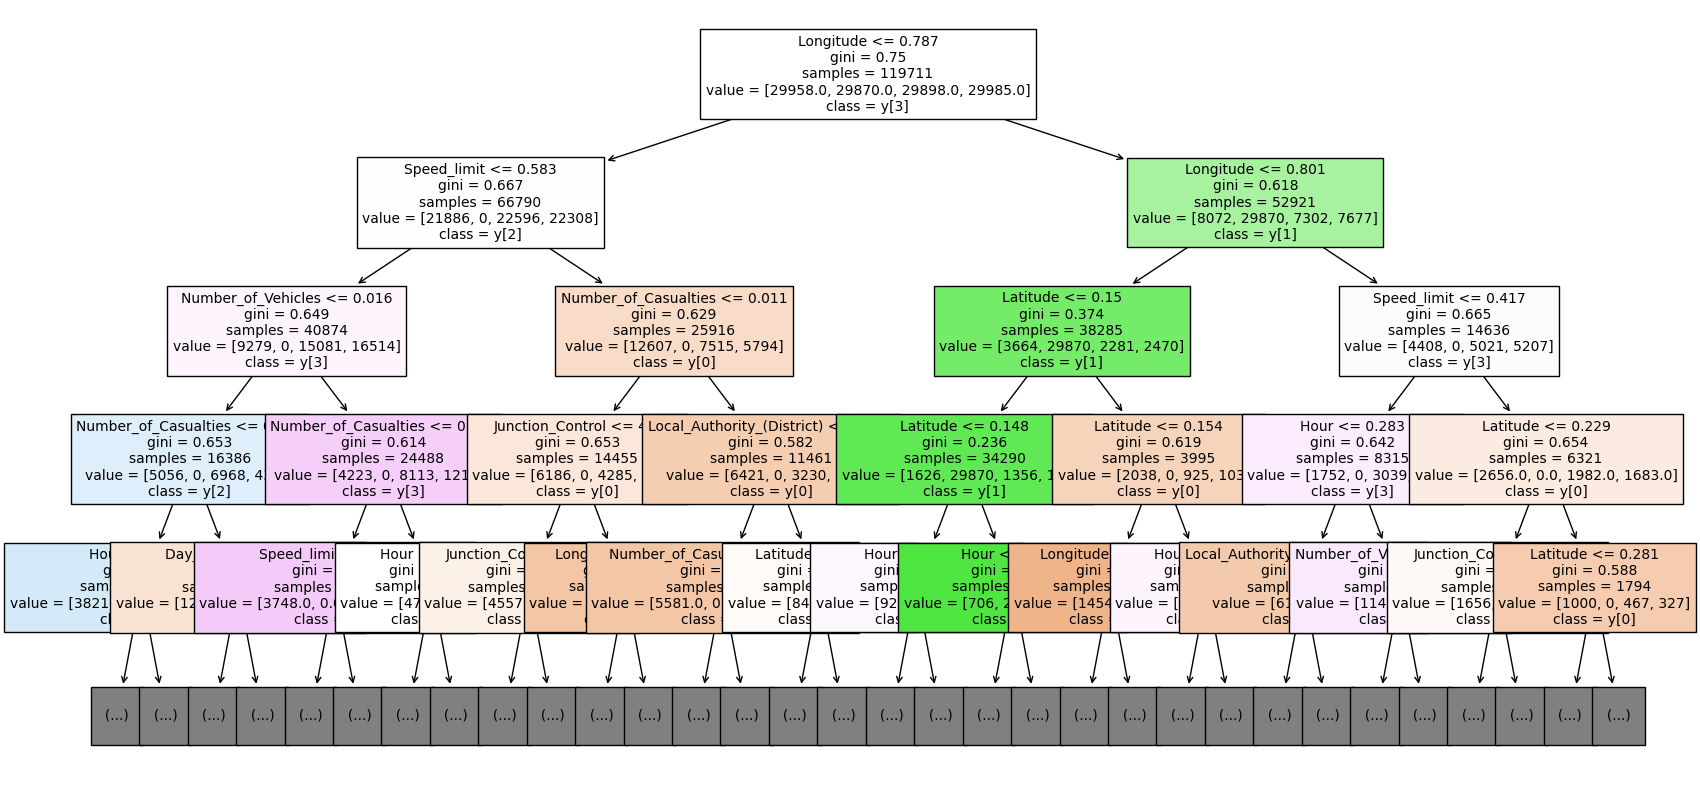

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

## Algorithms Evaluation

In [71]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [72]:
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29958
           1       1.00      1.00      1.00     29870
           2       1.00      1.00      1.00     29898
           3       1.00      1.00      1.00     29985

    accuracy                           1.00    119711
   macro avg       1.00      1.00      1.00    119711
weighted avg       1.00      1.00      1.00    119711

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12796
           1       1.00      1.00      1.00     12884
           2       0.85      0.99      0.91     12856
           3       0.99      0.80      0.89     12769

    accuracy                           0.95     51305
   macro avg       0.96      0.95      0.95     51305
weighted avg       0.96      0.95      0.95     51305



In [73]:
print(classification_report(y_train, dtc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29958
           1       1.00      1.00      1.00     29870
           2       1.00      1.00      1.00     29898
           3       1.00      1.00      1.00     29985

    accuracy                           1.00    119711
   macro avg       1.00      1.00      1.00    119711
weighted avg       1.00      1.00      1.00    119711



In [74]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12796
           1       1.00      1.00      1.00     12884
           2       0.85      0.99      0.91     12856
           3       0.99      0.80      0.89     12769

    accuracy                           0.95     51305
   macro avg       0.96      0.95      0.95     51305
weighted avg       0.96      0.95      0.95     51305



### Accuracy - Decision Tree

In [75]:
accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Decision Tree: ", accuracy["Decision Tree"])

Accuracy - Decision Tree:  0.9492447129909366


### F1-Score - Recall - Precision - Decision Tree

In [76]:
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Decision Tree: ", f1["Decision Tree"])
print("precision - Decision Tree: ", precisionScore)
print("recall - Decision Tree: ", recallScore)

f1-Score - Decision Tree:  0.9483441003273964
precision - Decision Tree:  0.9553756521861954
recall - Decision Tree:  0.9490304003214849


Draw PR (Precision - Recall) Curve - Decision Tree

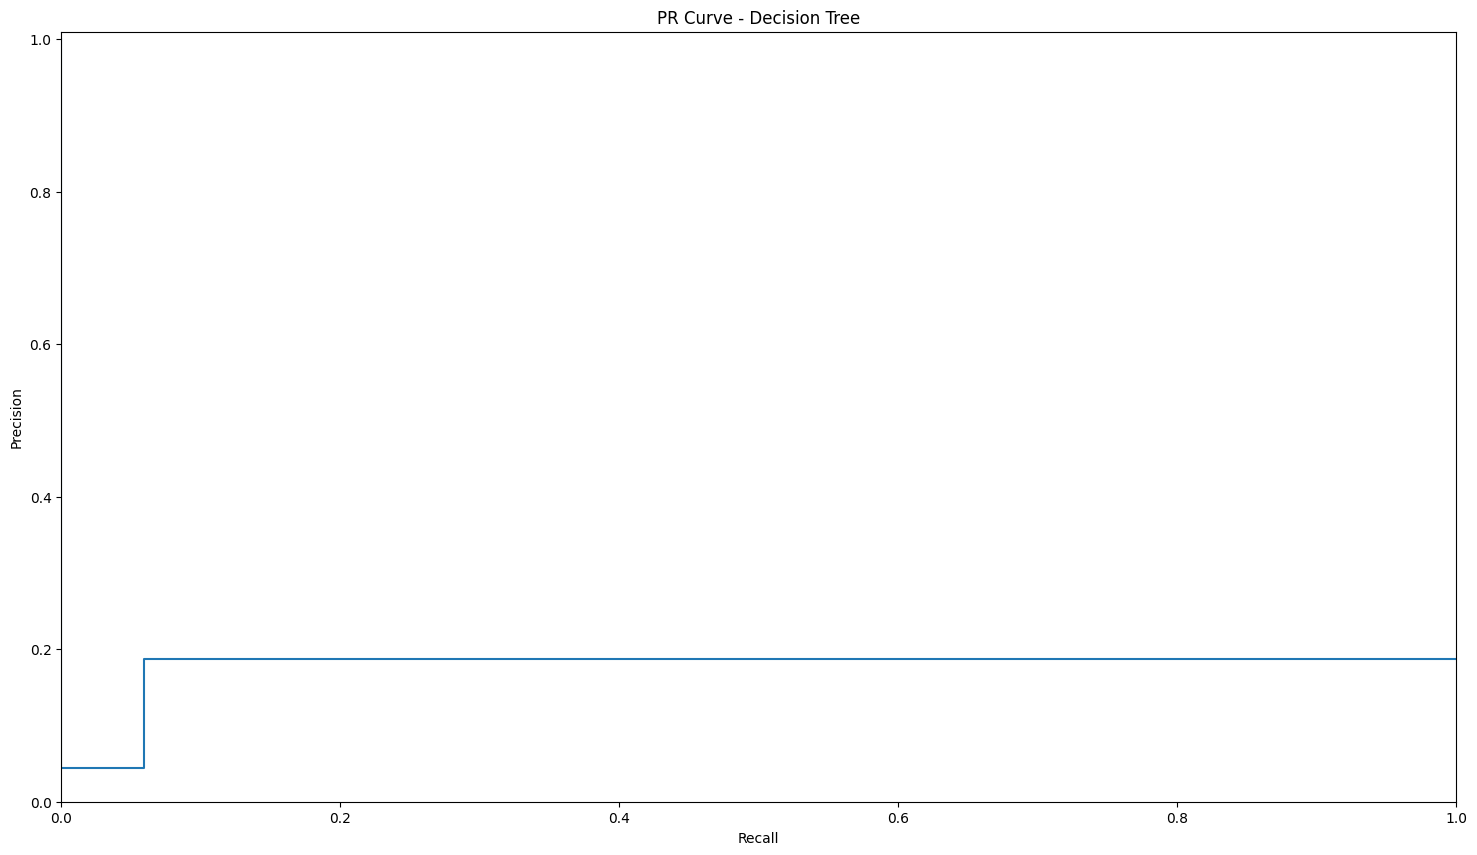

In [77]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_validate)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

### ROC curve - Decision Tree

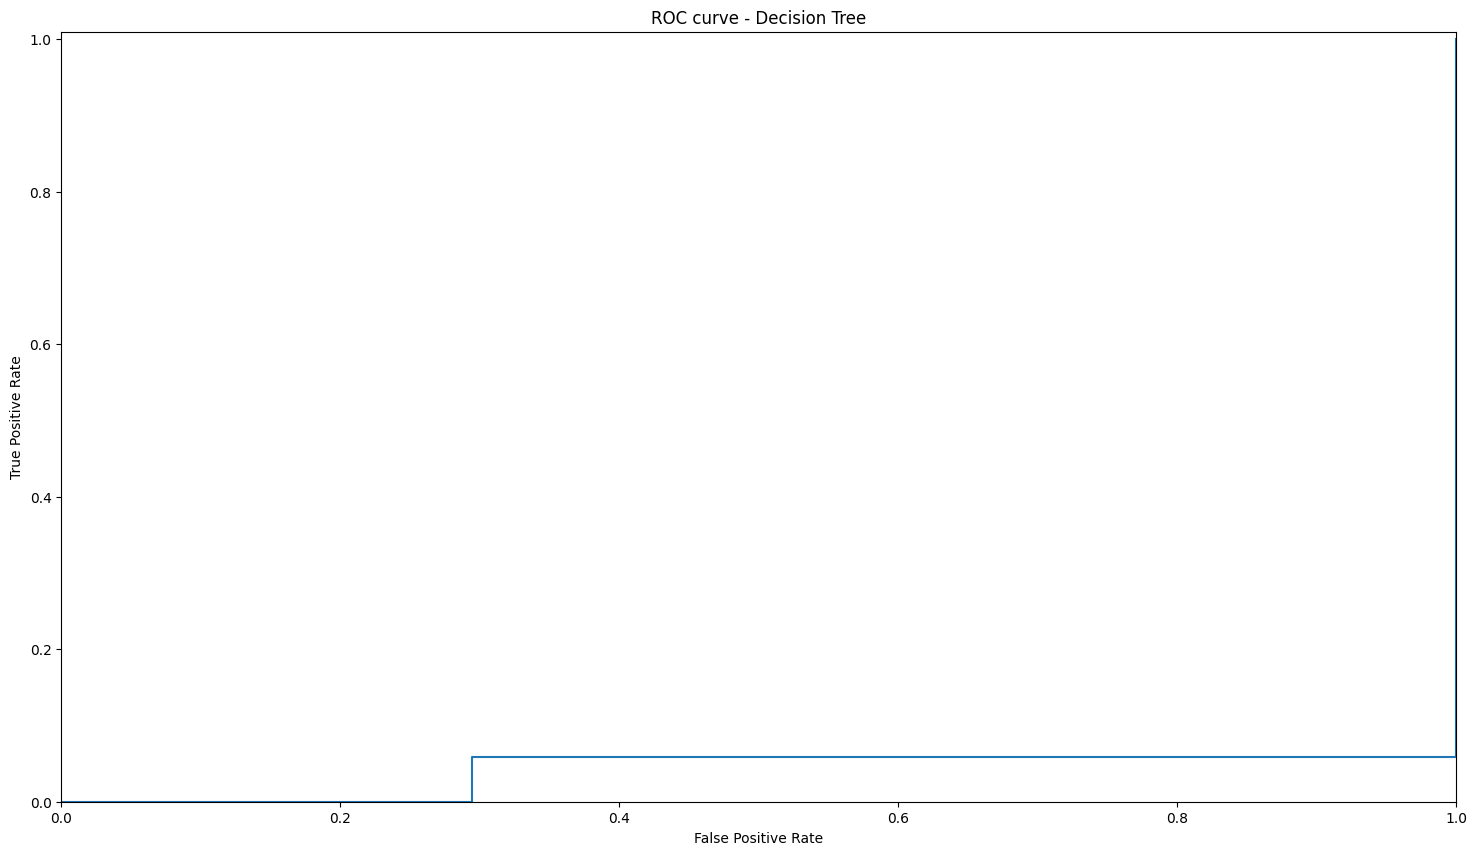

In [78]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = dtc.predict_proba(X_validate)

fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()